
# 8 Background and Educational Outcomes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_feather("./data/cleaned_parental_origin")

## 8.1 Distribution of Average PV Scores across Background

In [3]:
df_avg = df[df.columns[df.columns.str.contains("AVERAGE_PV")]]
print(df_avg.head())

   AVERAGE_PV_SCIENCE  AVERAGE_PV_MATHEMATICS  AVERAGE_PV_BIOLOGY  \
0          646.737090              617.370980          621.484356   
1          575.796714              526.669736          536.705586   
2          544.337234              496.228622          563.870548   
3          466.939476              485.207824          420.526000   
4          553.328876              512.365232          537.317922   

   AVERAGE_PV_CHEMISTRY  AVERAGE_PV_PHYSICS  AVERAGE_PV_EARTH_SCIENCE  
0            629.224984          604.773000                592.261964  
1            620.597004          575.948448                596.971438  
2            529.335138          493.620340                497.036416  
3            466.123642          481.604722                415.090720  
4            544.287360          531.582183                566.663730  


<Figure size 1800x1800 with 0 Axes>

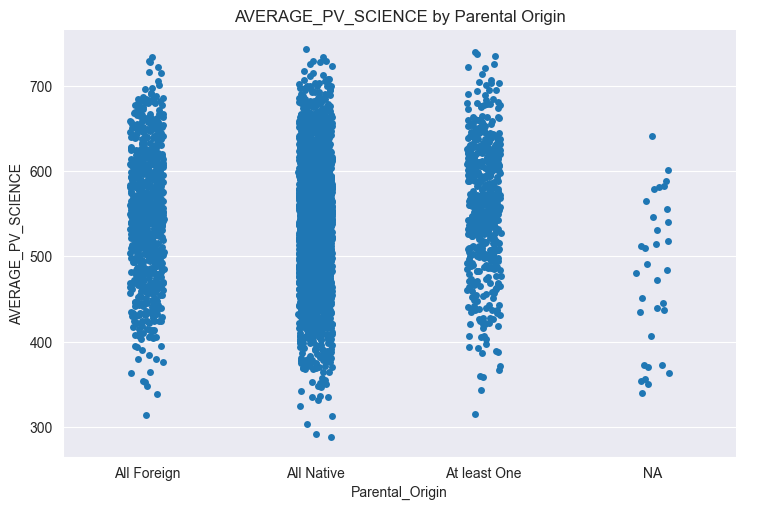

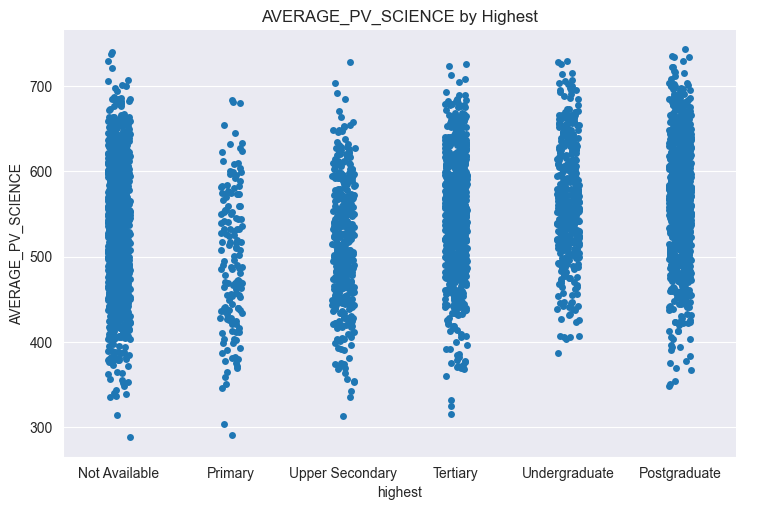

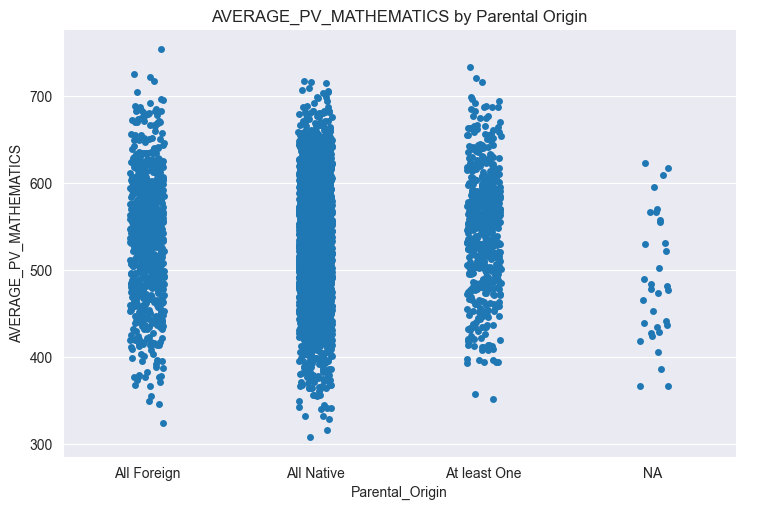

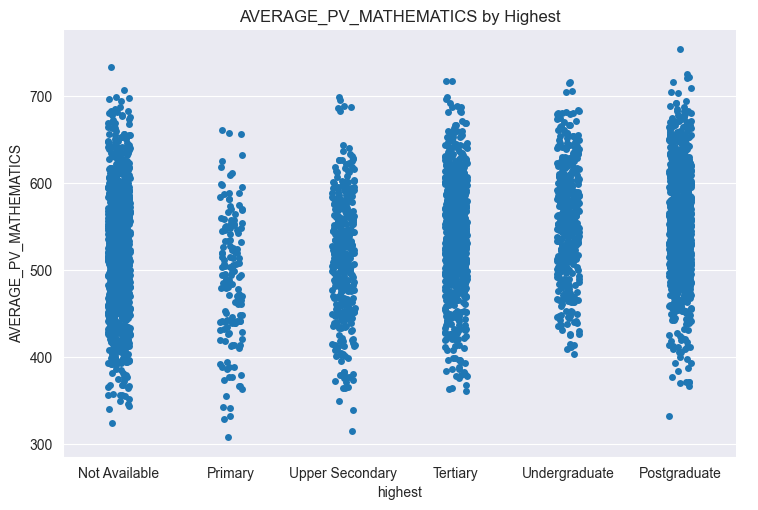

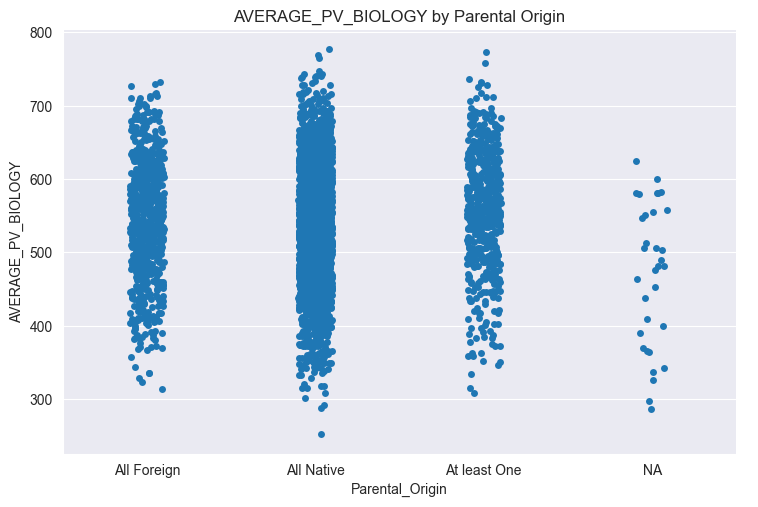

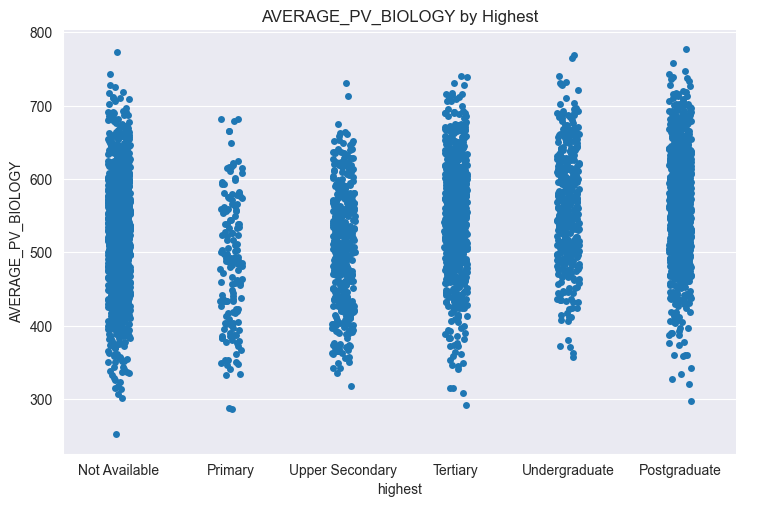

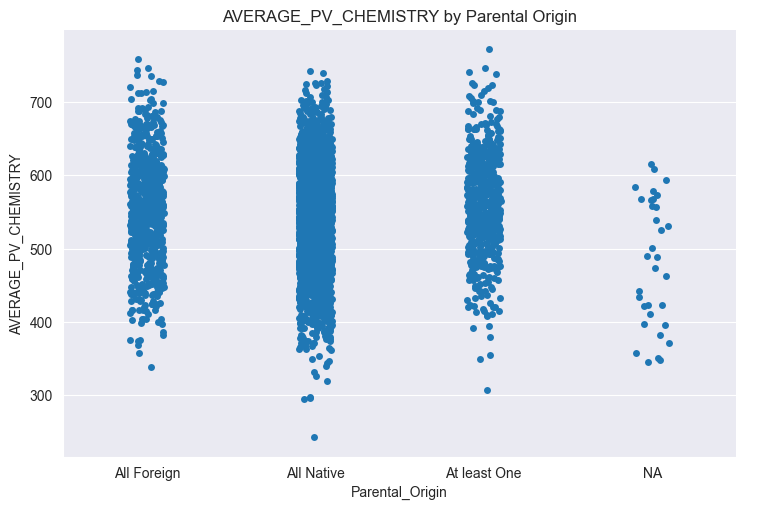

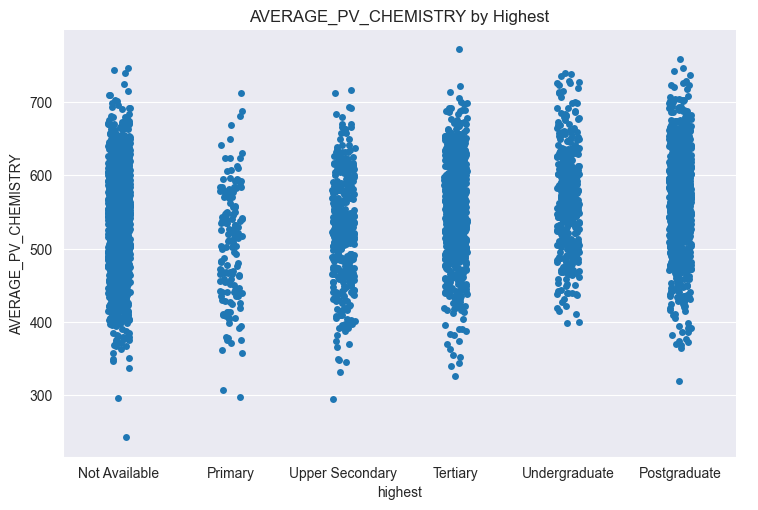

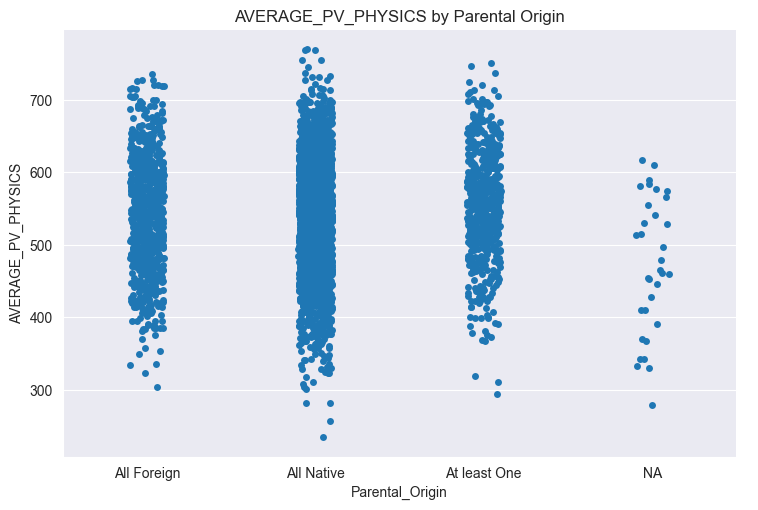

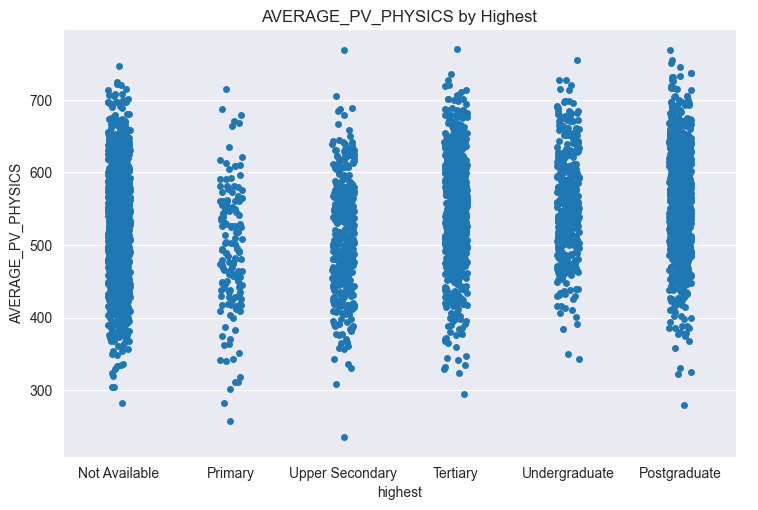

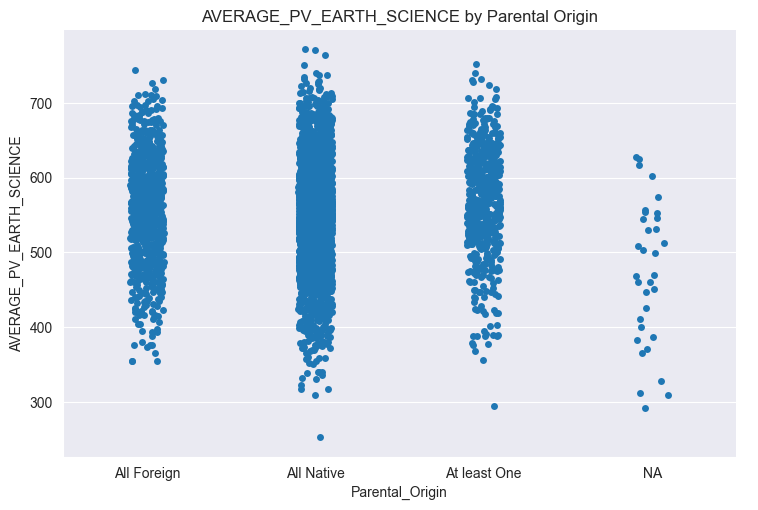

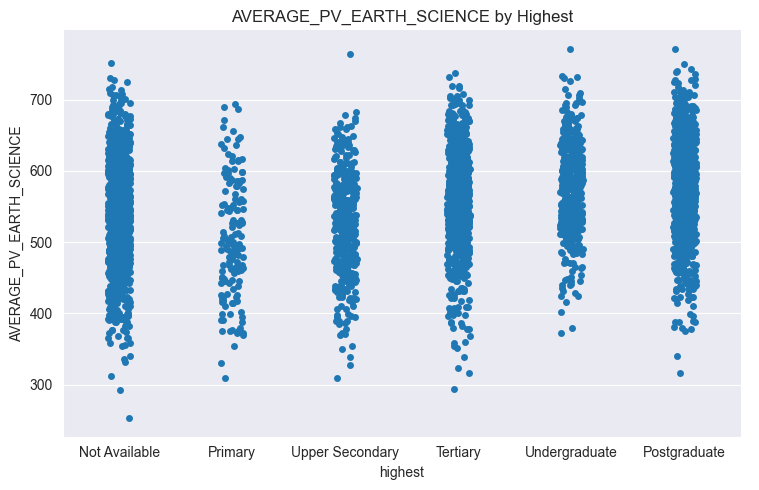

In [4]:
fig = plt.figure(figsize=(18, 18))
for index, col in enumerate(df_avg.columns):
    sns.catplot(data=df, y=col, x="Parental_Origin", kind="strip", height=5, aspect=1.5)
    plt.title(f"{col} by Parental Origin")  # Add title

    sns.catplot(data=df, y=col, x="highest", kind="strip", height=5, aspect=1.5)
    plt.title(f"{col} by Highest")  # Add title

plt.tight_layout()
plt.show()

In [87]:

origin_perfo = df.groupby("Parental_Origin", observed=False)
education_bg_perfo = df.groupby("highest", observed=False)
avg_columns = df.columns[df.columns.str.contains("AVERAGE_PV")]
for col in avg_columns:

    origin_mean = origin_perfo[col].mean()

    print(f"{origin_mean}    - Origin wise mean for {col}")

    education_mean = education_bg_perfo[col].mean()

Parental_Origin
All Foreign     549.217765
All Native      540.843685
At least One    560.510692
NA              478.561623
Name: AVERAGE_PV_SCIENCE, dtype: float64    - Origin wise mean for AVERAGE_PV_SCIENCE
Parental_Origin
All Foreign     539.091195
All Native      534.521622
At least One    547.027774
NA              488.351203
Name: AVERAGE_PV_MATHEMATICS, dtype: float64    - Origin wise mean for AVERAGE_PV_MATHEMATICS
Parental_Origin
All Foreign     545.583461
All Native      535.169532
At least One    558.128507
NA              470.769392
Name: AVERAGE_PV_BIOLOGY, dtype: float64    - Origin wise mean for AVERAGE_PV_BIOLOGY
Parental_Origin
All Foreign     555.894130
All Native      543.678763
At least One    562.489147
NA              481.582697
Name: AVERAGE_PV_CHEMISTRY, dtype: float64    - Origin wise mean for AVERAGE_PV_CHEMISTRY
Parental_Origin
All Foreign     546.232504
All Native      536.428360
At least One    555.552931
NA              472.783041
Name: AVERAGE_PV_PHYSICS

## 8.2 Subject Performance by Background

### 8.2.1 Best Performance by Background (90th and above percentile)

#### 8.2.1.1 Best performace in Science by Background

In [5]:
science_90th_percentile = df["AVERAGE_PV_SCIENCE"].quantile(0.90)

In [43]:
best_science_performers = df[df["AVERAGE_PV_SCIENCE"] >= science_90th_percentile]
origin_perfo = best_science_performers.groupby("Parental_Origin", observed=False)
education_bg_perfo = best_science_performers.groupby("highest", observed=False)
origin_perfo["AVERAGE_PV_SCIENCE"].describe(), education_bg_perfo["AVERAGE_PV_SCIENCE"].describe()


(                 count        mean        std         min         25%  \
 Parental_Origin                                                         
 All Foreign       91.0  668.001323  22.229919  640.416092  650.091228   
 All Native       226.0  667.073624  21.748516  640.043276  650.170501   
 At least One      70.0  670.923606  26.746565  640.467600  650.598612   
 NA                 1.0  640.740676        NaN  640.740676  640.740676   
 
                         50%         75%         max  
 Parental_Origin                                      
 All Foreign      662.960114  681.896599  734.363754  
 All Native       660.241645  680.110677  742.874860  
 At least One     661.870168  684.809460  739.261264  
 NA               640.740676  640.740676  640.740676  ,
                  count        mean        std         min         25%  \
 highest                                                                 
 Not Available     86.0  664.993107  22.353608  640.043276  650.350502   
 

<Axes: xlabel='Parental_Origin', ylabel='count'>

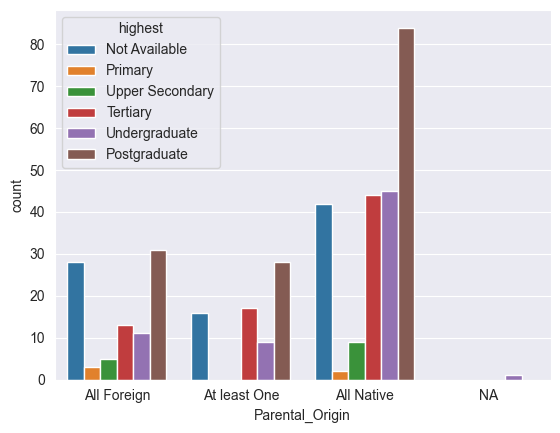

In [45]:
sns.countplot(data=best_science_performers, x="Parental_Origin" , hue="highest")


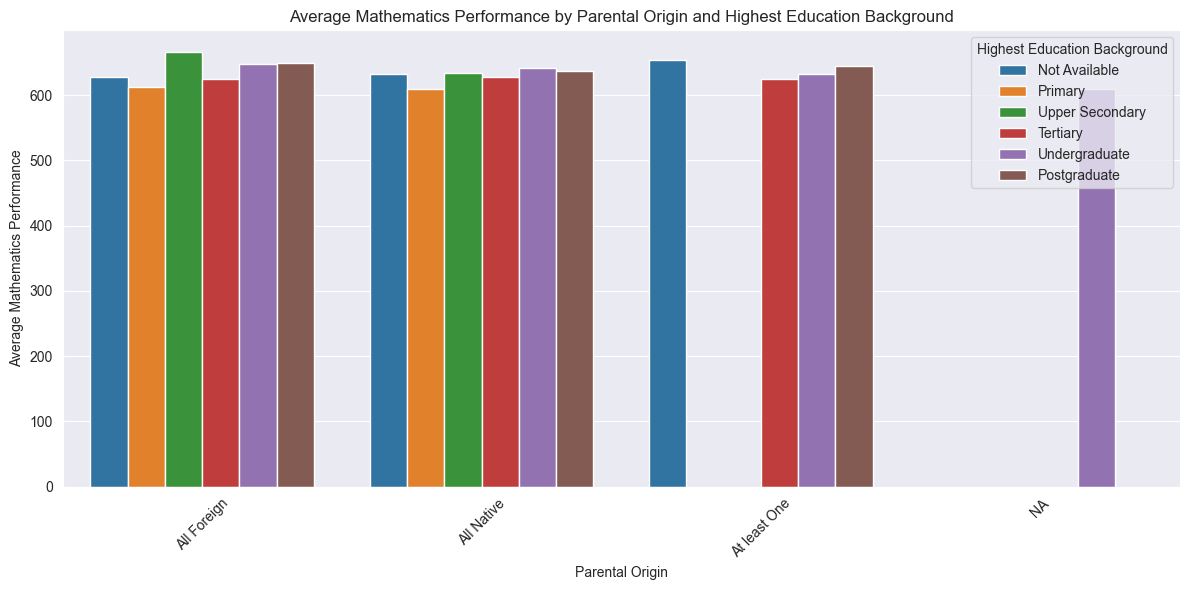

In [50]:
combined_agg = best_science_performers.groupby(["Parental_Origin", "highest"], observed=False)["AVERAGE_PV_MATHEMATICS"].mean().reset_index()

# Plot grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=combined_agg,
    x="Parental_Origin",
    y="AVERAGE_PV_MATHEMATICS",
    hue="highest"
)
plt.title("Average Mathematics Performance by Parental Origin and Highest Education Background")
plt.xlabel("Parental Origin")
plt.ylabel("Average Mathematics Performance")
plt.legend(title="Highest Education Background")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

#### 8.2.1.1 Best performace in Mathematics by Background

In [8]:
maths_90th_percentile = df["AVERAGE_PV_MATHEMATICS"].quantile(0.90)

In [46]:

best_maths_performers = df[df["AVERAGE_PV_MATHEMATICS"] >= maths_90th_percentile]
origin_perfo = best_maths_performers.groupby("Parental_Origin", observed=False)
education_bg_perfo = best_maths_performers.groupby("highest", observed=False)
origin_perfo["AVERAGE_PV_MATHEMATICS"].describe(), education_bg_perfo["AVERAGE_PV_MATHEMATICS"].describe()

(                 count        mean        std         min         25%  \
 Parental_Origin                                                         
 All Foreign       82.0  656.986637  27.722228  623.637804  634.414630   
 All Native       238.0  649.066999  21.025558  623.609720  632.073454   
 At least One      68.0  656.633353  25.159932  624.904320  637.749081   
 
                         50%         75%         max  
 Parental_Origin                                      
 All Foreign      651.082450  676.737956  753.278594  
 All Native       644.557420  658.371095  717.040002  
 At least One     654.236237  671.030747  733.345498  ,
                  count        mean        std         min         25%  \
 highest                                                                 
 Not Available     77.0  653.651645  23.048959  624.015860  634.947600   
 Primary            5.0  646.295646  16.665203  624.638532  632.032478   
 Upper Secondary   17.0  651.972112  29.377968  625.3554

<Axes: xlabel='Parental_Origin', ylabel='count'>

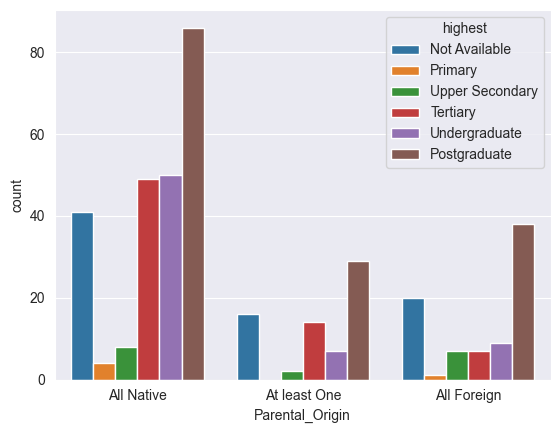

In [51]:
sns.countplot(data=best_maths_performers, x="Parental_Origin" , hue="highest")

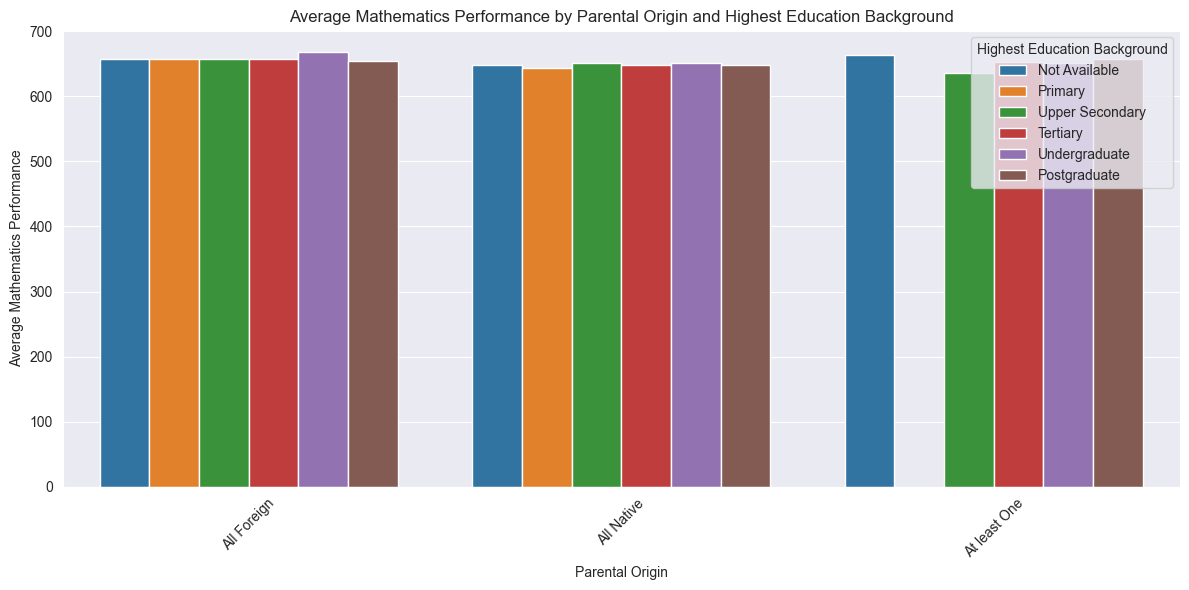

In [49]:
combined_agg = best_maths_performers.groupby(["Parental_Origin", "highest"], observed=False)["AVERAGE_PV_MATHEMATICS"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=combined_agg,
    x="Parental_Origin",
    y="AVERAGE_PV_MATHEMATICS",
    hue="highest"
)
plt.title("Average Mathematics Performance by Parental Origin and Highest Education Background")
plt.xlabel("Parental Origin")
plt.ylabel("Average Mathematics Performance")
plt.legend(title="Highest Education Background")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 8.2.1.3 Best performace in Physics by Background

In [11]:
phy_90th_percentile = df["AVERAGE_PV_PHYSICS"].quantile(0.90)

In [52]:

best_phy_performers = df[df["AVERAGE_PV_PHYSICS"] >= phy_90th_percentile]
origin_perfo = best_phy_performers.groupby("Parental_Origin", observed=False)
education_bg_perfo = best_phy_performers.groupby("highest", observed=False)
origin_perfo["AVERAGE_PV_PHYSICS"].describe(), education_bg_perfo["AVERAGE_PV_PHYSICS"].describe()

(                 count        mean        std         min         25%  \
 Parental_Origin                                                         
 All Foreign       90.0  673.395656  25.853299  640.191160  651.647232   
 All Native       220.0  671.242289  26.602088  639.657775  651.419701   
 At least One      78.0  672.010247  26.808135  639.749450  652.533424   
 
                         50%         75%         max  
 Parental_Origin                                      
 All Foreign      666.811103  691.713259  734.884400  
 All Native       666.281016  684.601809  769.432535  
 At least One     663.896152  692.608342  750.723822  ,
                  count        mean        std         min         25%  \
 highest                                                                 
 Not Available     85.0  670.635780  24.531185  639.862595  651.467625   
 Primary            6.0  680.466300  18.572678  663.370370  668.759474   
 Upper Secondary   13.0  673.930651  35.513916  642.2621

<Axes: xlabel='Parental_Origin', ylabel='count'>

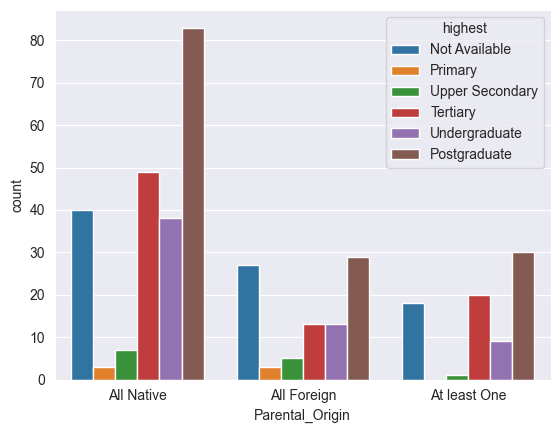

In [13]:
sns.countplot(data=best_phy_performers, x="Parental_Origin" , hue="highest")

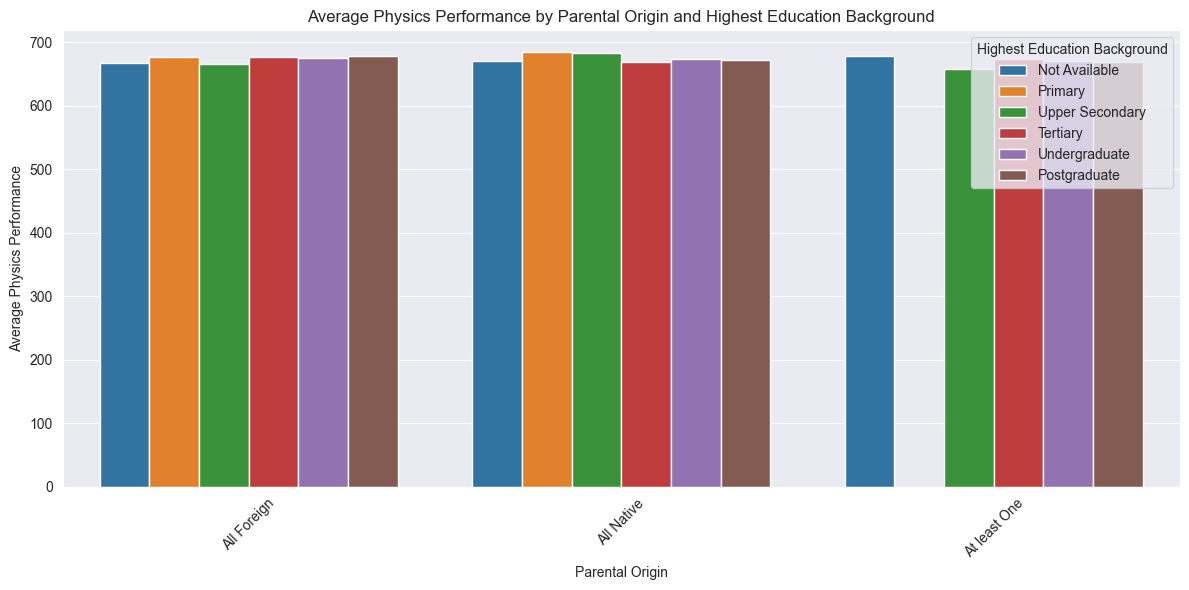

In [54]:
combined_agg = best_phy_performers.groupby(["Parental_Origin", "highest"], observed=False)["AVERAGE_PV_PHYSICS"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=combined_agg,
    x="Parental_Origin",
    y="AVERAGE_PV_PHYSICS",
    hue="highest"
)
plt.title("Average Physics Performance by Parental Origin and Highest Education Background")
plt.xlabel("Parental Origin")
plt.ylabel("Average Physics Performance")
plt.legend(title="Highest Education Background")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 8.2.1.4 Best performace in Chemistry by Background

In [14]:
chem_90th_percentile = df["AVERAGE_PV_CHEMISTRY"].quantile(0.90)

In [63]:
chem_phy_performers = df[df["AVERAGE_PV_CHEMISTRY"] >= phy_90th_percentile]
origin_perfo = chem_phy_performers.groupby("Parental_Origin", observed=False)
education_bg_perfo = chem_phy_performers.groupby("highest", observed=False)
origin_perfo["AVERAGE_PV_CHEMISTRY"].mean(), education_bg_perfo["AVERAGE_PV_CHEMISTRY"].mean()

(Parental_Origin
 All Foreign     674.517668
 All Native      666.918259
 At least One    674.177419
 Name: AVERAGE_PV_CHEMISTRY, dtype: float64,
 highest
 Not Available      666.837745
 Primary            673.585691
 Upper Secondary    670.675396
 Tertiary           666.098203
 Undergraduate      680.430683
 Postgraduate       670.228530
 Name: AVERAGE_PV_CHEMISTRY, dtype: float64)

<Axes: xlabel='Parental_Origin', ylabel='count'>

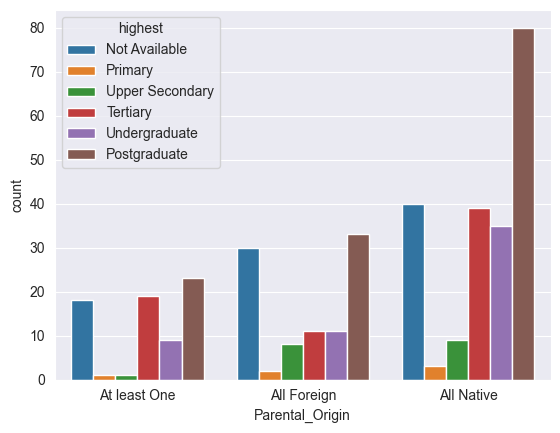

In [57]:
sns.countplot(data=chem_phy_performers, x="Parental_Origin" , hue="highest")

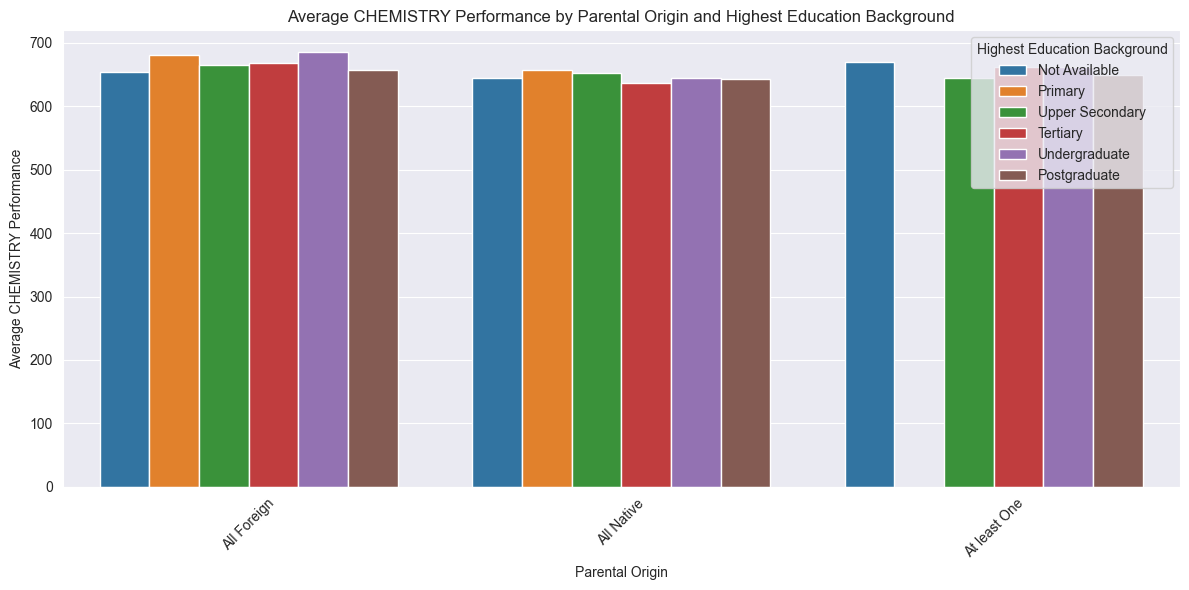

In [58]:
combined_agg = best_maths_performers.groupby(["Parental_Origin", "highest"], observed=False)["AVERAGE_PV_CHEMISTRY"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=combined_agg,
    x="Parental_Origin",
    y="AVERAGE_PV_CHEMISTRY",
    hue="highest"
)
plt.title("Average CHEMISTRY Performance by Parental Origin and Highest Education Background")
plt.xlabel("Parental Origin")
plt.ylabel("Average CHEMISTRY Performance")
plt.legend(title="Highest Education Background")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 8.2.1.5 Best performace in Biology by Background

In [17]:
bio_90th_percentile = df["AVERAGE_PV_BIOLOGY"].quantile(0.90)

In [64]:
bio_phy_performers = df[df["AVERAGE_PV_BIOLOGY"] >= bio_90th_percentile]
origin_perfo = bio_phy_performers.groupby("Parental_Origin", observed=False)
education_bg_perfo = bio_phy_performers.groupby("highest", observed=False)
origin_perfo["AVERAGE_PV_BIOLOGY"].mean(), education_bg_perfo["AVERAGE_PV_BIOLOGY"].mean()

(Parental_Origin
 All Foreign     676.909126
 All Native      674.426311
 At least One    675.522762
 Name: AVERAGE_PV_BIOLOGY, dtype: float64,
 highest
 Not Available      670.070238
 Primary            670.496667
 Upper Secondary    666.962989
 Tertiary           674.532045
 Undergraduate      677.343290
 Postgraduate       678.869717
 Name: AVERAGE_PV_BIOLOGY, dtype: float64)

<Axes: xlabel='Parental_Origin', ylabel='count'>

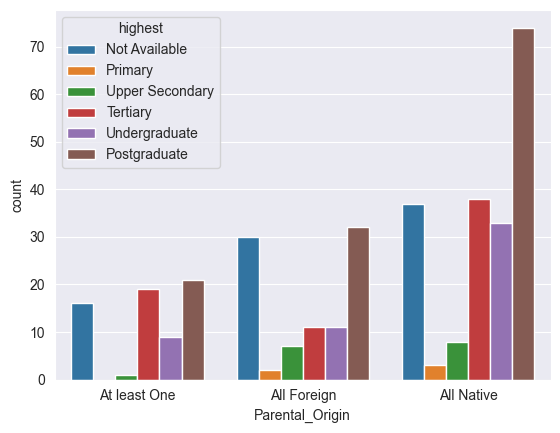

In [19]:
sns.countplot(data=bio_phy_performers, x="Parental_Origin" , hue="highest")

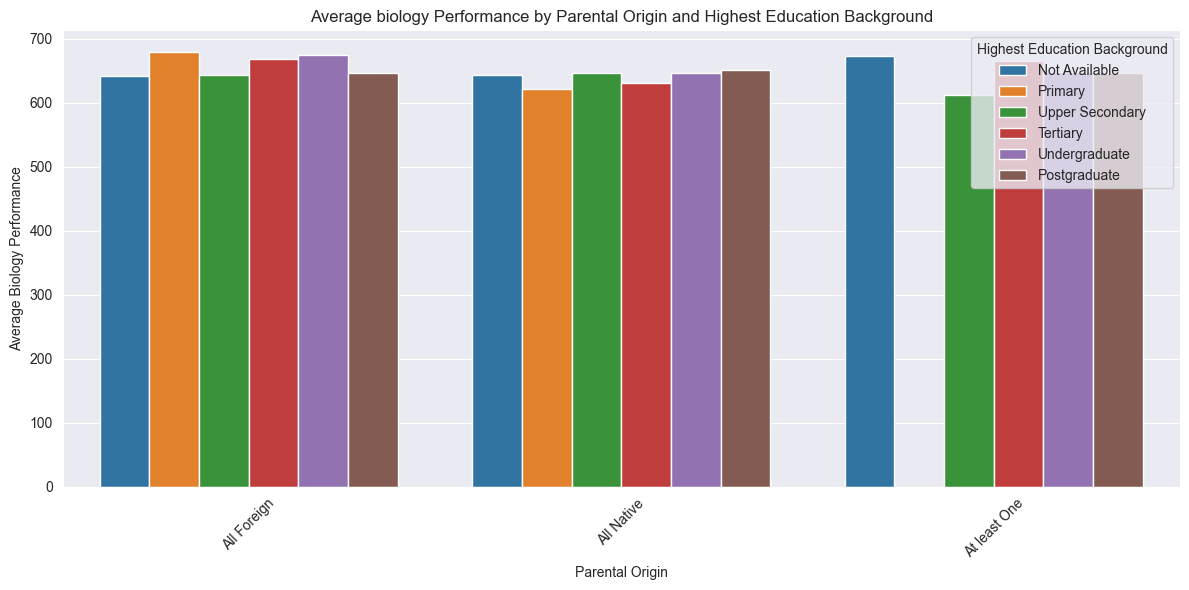

In [62]:
combined_agg = best_maths_performers.groupby(["Parental_Origin", "highest"], observed=False)["AVERAGE_PV_BIOLOGY"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=combined_agg,
    x="Parental_Origin",
    y="AVERAGE_PV_BIOLOGY",
    hue="highest"
)
plt.title("Average biology Performance by Parental Origin and Highest Education Background")
plt.xlabel("Parental Origin")
plt.ylabel("Average Biology Performance")
plt.legend(title="Highest Education Background")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 8.2.1.6 Best performace in Earth Scince by Background

In [20]:
es_percentile = df["AVERAGE_PV_EARTH_SCIENCE"].quantile(0.90)

In [66]:
es_performance = df[df["AVERAGE_PV_EARTH_SCIENCE"] >= es_percentile]
origin_perfo = es_performance.groupby("Parental_Origin", observed=False)
education_bg_perfo = es_performance.groupby("highest", observed=False)
origin_perfo["AVERAGE_PV_EARTH_SCIENCE"].mean(), education_bg_perfo["AVERAGE_PV_EARTH_SCIENCE"].mean()

(Parental_Origin
 All Foreign     674.760860
 All Native      676.015380
 At least One    676.613881
 Name: AVERAGE_PV_EARTH_SCIENCE, dtype: float64,
 highest
 Not Available      675.144923
 Primary            672.625256
 Upper Secondary    669.352097
 Tertiary           673.356335
 Undergraduate      677.783147
 Postgraduate       677.716458
 Name: AVERAGE_PV_EARTH_SCIENCE, dtype: float64)

<Axes: xlabel='Parental_Origin', ylabel='count'>

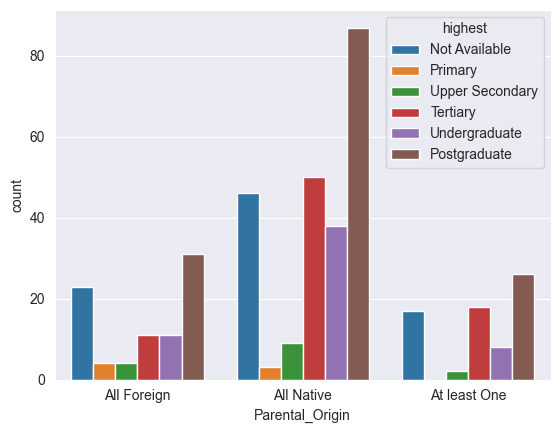

In [22]:
sns.countplot(data=es_performance, x="Parental_Origin" , hue="highest")

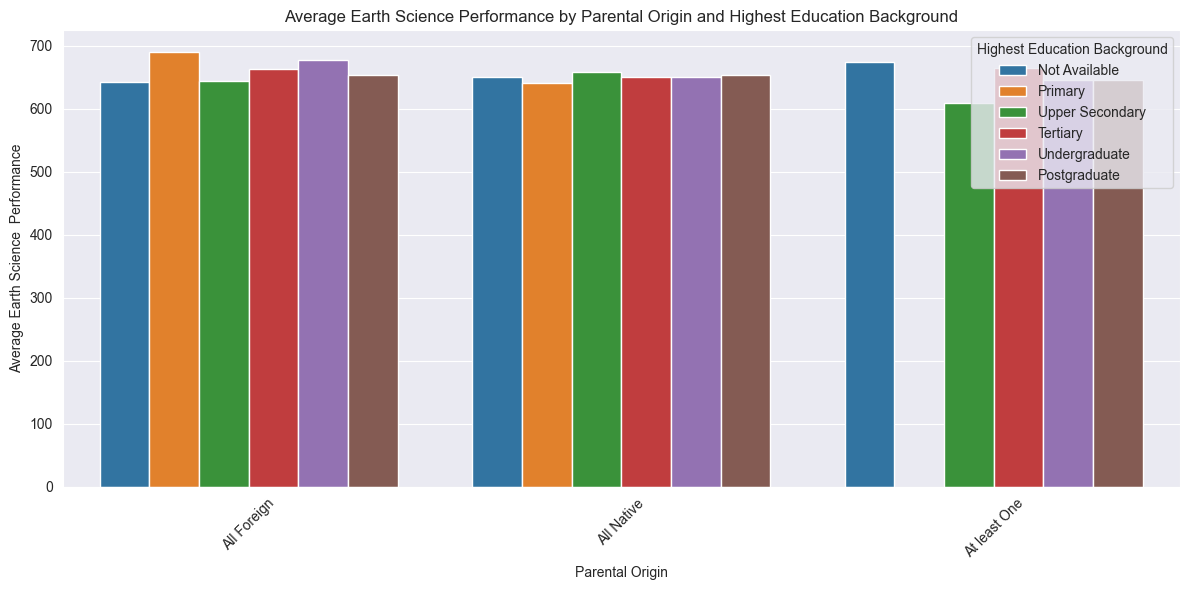

In [65]:
combined_agg = best_maths_performers.groupby(["Parental_Origin", "highest"], observed=False)["AVERAGE_PV_EARTH_SCIENCE"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=combined_agg,
    x="Parental_Origin",
    y="AVERAGE_PV_EARTH_SCIENCE",
    hue="highest"
)
plt.title("Average Earth Science Performance by Parental Origin and Highest Education Background")
plt.xlabel("Parental Origin")
plt.ylabel("Average Earth Science  Performance")
plt.legend(title="Highest Education Background")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 8.2.2 BAd Performance by Background (10th and below percentiles)

#### 8.2.2.1 Best performace in Science by Background

In [23]:
science_10th_percentile = df["AVERAGE_PV_SCIENCE"].quantile(0.10)

In [71]:
bad_science_performers = df[df["AVERAGE_PV_SCIENCE"] <= science_10th_percentile]
origin_perfo = bad_science_performers.groupby("Parental_Origin", observed=False)
education_bg_perfo = bad_science_performers.groupby("highest", observed=False)
origin_perfo["AVERAGE_PV_SCIENCE"].describe(), education_bg_perfo["AVERAGE_PV_SCIENCE"].describe()


(                 count        mean        std         min         25%  \
 Parental_Origin                                                         
 All Foreign       74.0  415.344186  28.195790  313.761826  405.808602   
 All Native       260.0  409.931176  30.421659  288.093734  391.580820   
 At least One      41.0  411.203301  30.273899  315.442062  394.085404   
 NA                13.0  388.048045  38.939067  340.152534  356.418316   
 
                         50%         75%         max  
 Parental_Origin                                      
 All Foreign      424.017190  434.955980  445.092988  
 All Native       417.914218  433.737402  445.461590  
 At least One     421.346394  434.495566  443.168792  
 NA               372.596768  435.133162  445.119072  ,
                  count        mean        std         min         25%  \
 highest                                                                 
 Not Available    160.0  410.691299  29.340795  288.093734  396.900763   
 

<Axes: xlabel='Parental_Origin', ylabel='count'>

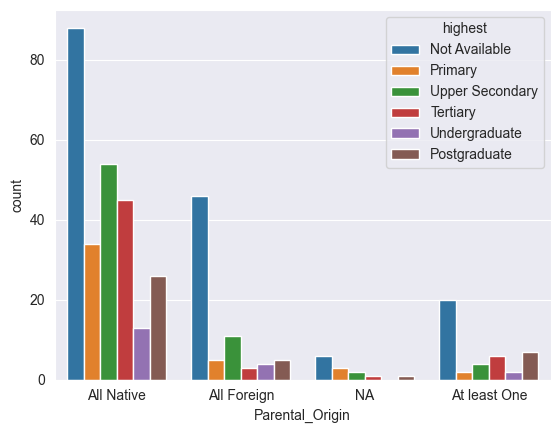

In [25]:
sns.countplot(data=bad_science_performers, x="Parental_Origin" , hue="highest")

#### 8.2.2.2 Bad performace in Mathematics by Background

In [26]:
maths_10th_percentile = df["AVERAGE_PV_MATHEMATICS"].quantile(0.10)

In [72]:
bad_maths_performers = df[df["AVERAGE_PV_MATHEMATICS"] <= maths_10th_percentile]
origin_perfo = bad_maths_performers.groupby("Parental_Origin", observed=False)
education_bg_perfo = bad_maths_performers.groupby("highest", observed=False)
origin_perfo["AVERAGE_PV_MATHEMATICS"].mean(), education_bg_perfo["AVERAGE_PV_MATHEMATICS"].mean()


(Parental_Origin
 All Foreign     410.907012
 All Native      409.562814
 At least One    415.735029
 NA              414.433663
 Name: AVERAGE_PV_MATHEMATICS, dtype: float64,
 highest
 Not Available      412.041222
 Primary            402.974893
 Upper Secondary    405.691810
 Tertiary           412.701658
 Undergraduate      427.255203
 Postgraduate       409.977566
 Name: AVERAGE_PV_MATHEMATICS, dtype: float64)

<Axes: xlabel='Parental_Origin', ylabel='count'>

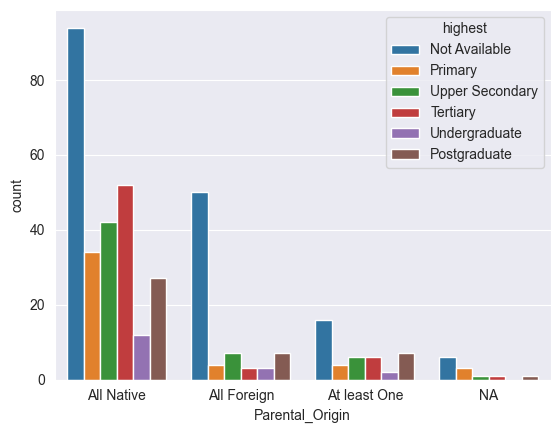

In [28]:
sns.countplot(data=bad_maths_performers, x="Parental_Origin" , hue="highest")

#### 8.2.2.3 Bad performace in Physics by Background

In [29]:
phy_10th_percentile = df["AVERAGE_PV_PHYSICS"].quantile(0.10)

In [74]:
bad_phy_performers = df[df["AVERAGE_PV_PHYSICS"] <= phy_10th_percentile]
origin_perfo = bad_phy_performers.groupby("Parental_Origin", observed=False)
education_bg_perfo = bad_phy_performers.groupby("highest", observed=False)
origin_perfo["AVERAGE_PV_PHYSICS"].mean(), education_bg_perfo["AVERAGE_PV_PHYSICS"].mean()


(Parental_Origin
 All Foreign     404.858600
 All Native      398.805232
 At least One    402.717799
 NA              364.100512
 Name: AVERAGE_PV_PHYSICS, dtype: float64,
 highest
 Not Available      401.396409
 Primary            383.045353
 Upper Secondary    400.418571
 Tertiary           400.296685
 Undergraduate      408.819489
 Postgraduate       399.080797
 Name: AVERAGE_PV_PHYSICS, dtype: float64)

<Axes: xlabel='Parental_Origin', ylabel='count'>

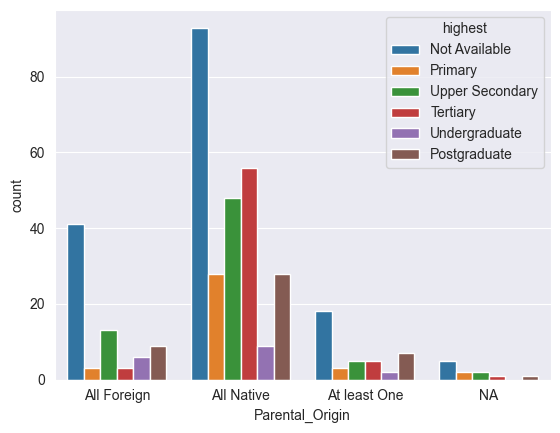

In [31]:
sns.countplot(data=bad_phy_performers, x="Parental_Origin" , hue="highest")

#### 8.2.2.4 Bad performace in Chemistry by Background

In [32]:
chem_10th_percentile = df["AVERAGE_PV_CHEMISTRY"].quantile(0.10)

In [76]:
bad_chem_performers = df[df["AVERAGE_PV_CHEMISTRY"] <= phy_10th_percentile]
origin_perfo = bad_chem_performers.groupby("Parental_Origin", observed=False)
education_bg_perfo = bad_chem_performers.groupby("highest", observed=False)
origin_perfo["AVERAGE_PV_CHEMISTRY"].mean(), education_bg_perfo["AVERAGE_PV_CHEMISTRY"].mean()

(Parental_Origin
 All Foreign     409.735724
 All Native      403.514686
 At least One    406.935081
 NA              389.629053
 Name: AVERAGE_PV_CHEMISTRY, dtype: float64,
 highest
 Not Available      405.224737
 Primary            397.500875
 Upper Secondary    402.472441
 Tertiary           401.895487
 Undergraduate      417.948388
 Postgraduate       407.045851
 Name: AVERAGE_PV_CHEMISTRY, dtype: float64)

<Axes: xlabel='Parental_Origin', ylabel='count'>

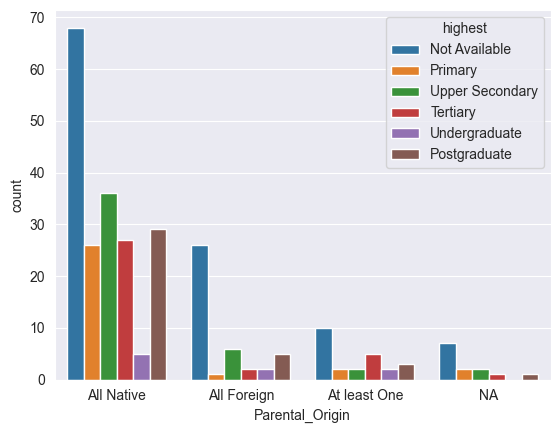

In [77]:
sns.countplot(data=bad_chem_performers, x="Parental_Origin" , hue="highest")

#### 8.2.2.5 Bad performace in Biology by Background

In [35]:
bio_10th_percentile = df["AVERAGE_PV_BIOLOGY"].quantile(0.10)

In [79]:
bad_bio_performers = df[df["AVERAGE_PV_BIOLOGY"] <= phy_10th_percentile]
origin_perfo = bad_bio_performers.groupby("Parental_Origin", observed=False)
education_bg_perfo = bad_bio_performers.groupby("highest", observed=False)
origin_perfo["AVERAGE_PV_BIOLOGY"].mean(), education_bg_perfo["AVERAGE_PV_BIOLOGY"].mean()


(Parental_Origin
 All Foreign     402.818310
 All Native      398.353386
 At least One    388.647429
 NA              360.343662
 Name: AVERAGE_PV_BIOLOGY, dtype: float64,
 highest
 Not Available      396.786465
 Primary            389.947812
 Upper Secondary    399.653008
 Tertiary           395.945454
 Undergraduate      410.899799
 Postgraduate       398.115983
 Name: AVERAGE_PV_BIOLOGY, dtype: float64)

<Axes: xlabel='Parental_Origin', ylabel='count'>

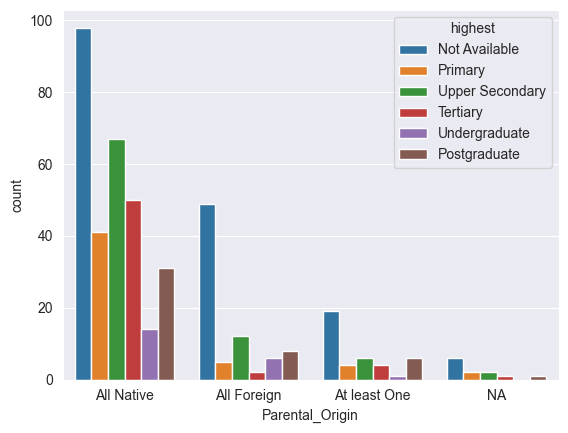

In [37]:
sns.countplot(data=bad_bio_performers, x="Parental_Origin" , hue="highest")

#### 8.2.2.6 Bad performace in Earth Science by Background

In [38]:
es_10th_percentile = df["AVERAGE_PV_EARTH_SCIENCE"].quantile(0.10)

In [82]:

bad_es_performers = df[df["AVERAGE_PV_EARTH_SCIENCE"] <= es_10th_percentile]
origin_perfo = bad_es_performers.groupby("Parental_Origin", observed=False)
education_bg_perfo = bad_es_performers.groupby("highest", observed=False)
origin_perfo["AVERAGE_PV_EARTH_SCIENCE"].mean(), education_bg_perfo["AVERAGE_PV_EARTH_SCIENCE"].mean()


(Parental_Origin
 All Foreign     403.161811
 All Native      398.095807
 At least One    393.859015
 NA              362.080972
 Name: AVERAGE_PV_EARTH_SCIENCE, dtype: float64,
 highest
 Not Available      398.188255
 Primary            394.154439
 Upper Secondary    397.543098
 Tertiary           391.512755
 Undergraduate      410.167801
 Postgraduate       397.093465
 Name: AVERAGE_PV_EARTH_SCIENCE, dtype: float64)

<Axes: xlabel='Parental_Origin', ylabel='count'>

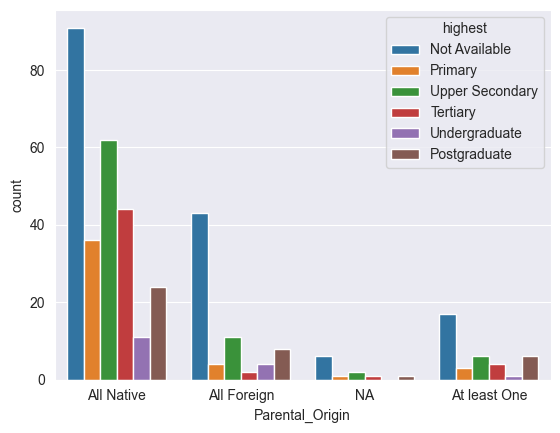

In [40]:
sns.countplot(data=bad_es_performers, x="Parental_Origin" , hue="highest")